In [1]:
import numpy as np
import csv

In [2]:
category = {'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}

vals = {}

with open('DATA/MiniTrain.csv', mode ='r') as file:   
    csvFile = csv.reader(file)
    i = 0;
    for lines in csvFile:
        if i == 0:
            i = i + 1
            continue
        else:
            for word in lines[1].split(' '):
                if word in vals:
                    vals[word][category[lines[2]]] = vals[word][category[lines[2]]] + 1
                else:
                    vals[word] = [0,0,0,0,0]
                    vals[word][category[lines[2]]] = 1

In [3]:
print(vals['mobile'])

[18, 1, 3, 0, 226]


In [4]:
for values in vals:
    total = sum(vals[values])
    for i in range(5):
        vals[values][i] = vals[values][i]/total

In [5]:
print(vals['mobile'])

[0.07258064516129033, 0.004032258064516129, 0.012096774193548387, 0.0, 0.9112903225806451]


In [6]:
weights = {}
HUNDRED = 90
for values in vals:
    weights[values] = np.array(vals[values])
    for i in range(5):
        if (sum(vals[values]) - vals[values][i]) != 0.0 and vals[values][i] != 0.0:
            weights[values][i] = np.exp(np.log(vals[values][i] / (sum(vals[values]) - vals[values][i])))
        else:
            weights[values][i] = 0.0


In [7]:
print(vals['day'])
print(weights['day'])

[0.11029411764705882, 0.2867647058823529, 0.20588235294117646, 0.22058823529411764, 0.17647058823529413]
[0.12396694 0.40206186 0.25925926 0.28301887 0.21428571]


In [14]:
with open('DATA/MiniTest.csv', mode ='r') as file:   
    csvFile = csv.reader(file)
    accuracy = 0
    size = 0
    for lines in csvFile:
        size += 1
        prob = [0.0, 0.0, 0.0, 0.0, 0.0]
        for i in range(5):
            for word in lines[1].split(' '):
                if word in weights:
                    prob[i] = prob[i] + vals[word][i] * weights[word][i]
        maxProb = max(prob)
        if maxProb == prob[0]:
            if lines[2] == "business":
                accuracy += 1
            # print(lines[0], " ", 'business', " ", lines[2])
        elif maxProb == prob[1]:
            if lines[2] == "entertainment":
                accuracy += 1
            # print(lines[0], " ", 'entertainment', " ", lines[2])
        elif maxProb == prob[2]:
            if lines[2] == "politics":
                accuracy += 1
            # print(lines[0], " ", 'politics', " ", lines[2])
        elif maxProb == prob[3]:
            if lines[2] == 'sport':
                accuracy += 1
            # print(lines[0], " ", 'sport', " ", lines[2])
        elif maxProb == prob[4]:
            if lines[2] == 'tech':
                accuracy += 1
            # print(lines[0], " ", 'tech', " ", lines[2])
print("Accuracy: ", accuracy / size * HUNDRED, "%")


Accuracy:  85.60081466395113 %


In [15]:
import matplotlib.pyplot as plot
import pandas as pd

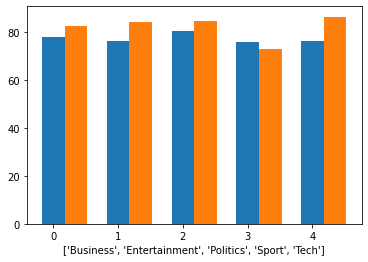

In [16]:
ExistingModel = [78.00341, 76.27842, 80.25695, 75.85361, 76.10006]
ProposedModel = [82.36892, 84.29505, 84.44507, 72.68903, 86.33905]
width = 0.35
index = ['Business', 'Entertainment', 'Politics', 'Sport', 'Tech'];

plot.bar(np.arange(len(ExistingModel)), ExistingModel, width=width)
plot.bar(np.arange(len(ProposedModel)) + width, ProposedModel, width=width)
plot.xlabel(index)
plot.show()
